In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [68]:
training_data = pd.read_csv('../Datasets/full_scaled_data.csv')

In [69]:
training_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto,service,ACC,CLO,CON,FIN,INT,REQ,RST,label
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0


In [70]:
X = training_data.drop(columns=['label'])
y = training_data['label']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
classify_type = "binary"

In [73]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [74]:
print("Accuracy:    ", accuracy_score(y_test, y_test_pred))
print("Precision:   ", precision_score(y_test, y_test_pred))
print("Recall:      ", recall_score(y_test, y_test_pred))
print("F1-score:    ", f1_score(y_test, y_test_pred))

Accuracy:     0.9764854491570714
Precision:    0.9831640833778728
Recall:       0.973967525591246
F1-score:     0.9785441971806011


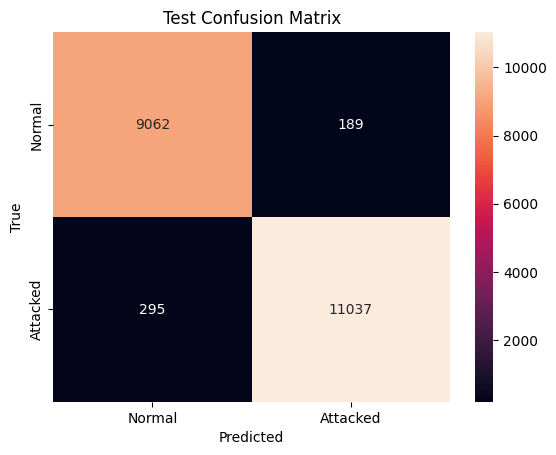

In [75]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_test = sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
#plt.savefig('../images/rf_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()